In [70]:
import numpy as np
import gzip
from copy import deepcopy
f = gzip.open('train-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 10000
f.read(16)
buf = f.read(image_size * image_size * num_images)# read 
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32) 
data = data.reshape(num_images,image_size*image_size,1)# reshhape it to vector 


In [71]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')# read labels
f.read(8)
nums=[]
for i in range(0,num_images):   
    buf = f.read(1)
    nums.append(int(np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]))

In [72]:
def dist (x, centroid): # calculate distnce from single data to all centeroids
    ret = []
    for i in centroid :
        ret.append(np.linalg.norm(x-i))
    return ret

def most_frequent(List): 
    return max(set(List), key = List.count) 

In [73]:
def get_closest(centroids) : # return the closest centeroid
        return centroids.index(min(centroids))

In [74]:
def initialize_centroids(data, num_clusters):# initialize centroids by using standard deviation to ensure it covers all samples
        mean = np.mean(data, axis = 0)
        std = np.std(data, axis = 0)
        return np.random.randn(num_clusters,28*28,1)*std + mean

In [75]:
centeroides =initialize_centroids(data,10) # init  with number of clusters

In [76]:
itr = 50  
err = 0.001 # tolerance
new_centeroides= deepcopy(centeroides)
dist_plt = []
val = [100000000]*len(centeroides)# to get closest image to centeroid 
rep = [None]*len(centeroides) 
distoration=0
for kk in range(itr) :
    dist_plt.append(distoration)
    distoration=0 # init destortion
    print("iteration number " + str(kk+1))
    distances =[None]*len(centeroides) # initialise distance
    labels=[[None]]*len(centeroides)#keep labels for every centeroid
    for i in range(len(centeroides)):
        distances[i]=np.zeros((784,1)) 
        labels[i]=[-1]
    for x in range(len(data)) : 
        temp= get_closest(dist(data[x], centeroides)) # the index of closest centeroid
        temp = int(temp)
        if(np.linalg.norm(data[x]- centeroides[temp])<val[temp]) : # check it it is closest to centeroid
            val[temp]=np.linalg.norm(data[x]- centeroides[temp])
            rep[temp]=data[x]
        distances[temp]=np.append(distances[temp],data[x],axis=0) # add data 
        distoration +=np.linalg.norm(data[x]- centeroides[temp])
        # calculate distortion
        labels[temp].append(nums[x]) # put the label no in the labels
    for i in range(len(centeroides)) :
    #    print(np.mean(distances[i], axis=0))
        new_centeroides[i]=(np.mean(distances[i])) # getting new centers
        
    #print(np.linalg.norm(new_centeroides - centeroides))
    err =np.linalg.norm(new_centeroides - centeroides) # calculating error
    if err <= 0.001 :
        break  
    print("distortion = "+str(distoration))
    print("err =  " + str(err))
    centeroides = deepcopy(new_centeroides) # assigning new centers
for i in range (len(labels)) :
    labels[i]=most_frequent(labels[i]) # after finishing labeling the centeroids for testing 

iteration number 1
distortion = 24858627.68130875
err =  6952.915167890959
iteration number 2
distortion = 21620094.80560903
err =  243.23363175745533
iteration number 3
distortion = 21576365.43746342
err =  108.23525340274487
iteration number 4
distortion = 21569041.099256184
err =  75.94889666132804
iteration number 5
distortion = 21565588.00520476
err =  63.271138941316345
iteration number 6
distortion = 21563416.044440076
err =  52.89462960269917
iteration number 7
distortion = 21561879.44379959
err =  48.78758289088459
iteration number 8
distortion = 21560691.44061169
err =  40.70186936662626
iteration number 9
distortion = 21559846.83148187
err =  37.98216786028442
iteration number 10
distortion = 21559185.544403855
err =  31.732823023523604
iteration number 11
distortion = 21558722.67803418
err =  27.363462371909538
iteration number 12
distortion = 21558370.15219748
err =  25.04602778569768
iteration number 13
distortion = 21558079.895313513
err =  22.42150928522605
iteration nu

In [77]:
import matplotlib.pyplot as plt
import time 
image_size = 28
num_images =10000
z=gzip.open('t10k-images-idx3-ubyte.gz','r') # read test 
z.read(16)
buf = z.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images,image_size*image_size,1)
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
cnt = 0 
mis = 0 
for x in data :
     temp = get_closest(dist(x, centeroides)) # seeing closest centeroid 
     buf = f.read(1)
     if int(np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]) == temp : # testing 
        mis +=1 # wrong answer 
     cnt += 1
print (mis) 

739


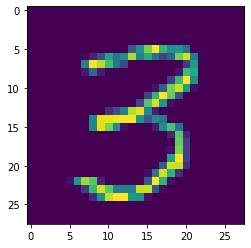

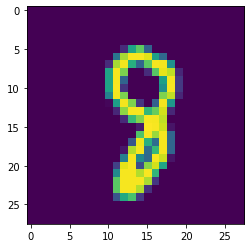

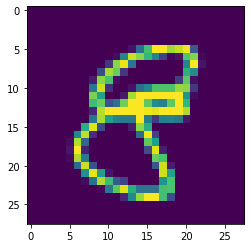

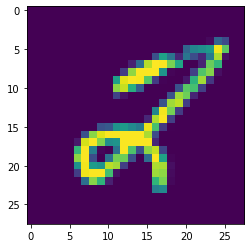

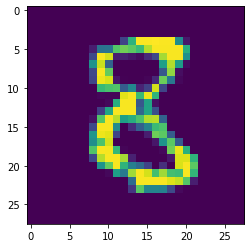

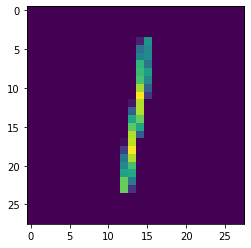

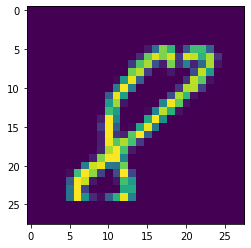

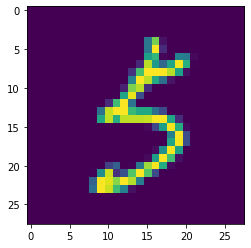

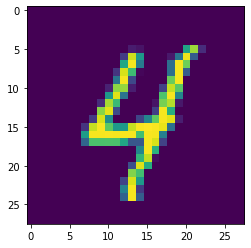

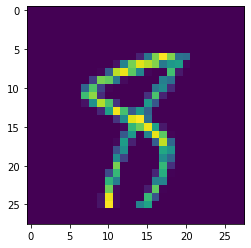

In [79]:
cnt= 0 
for x in rep :  # most represent image to each cluster 
     image = x.reshape(28,28,1).squeeze()
     plt.imshow(image)
     plt.show()

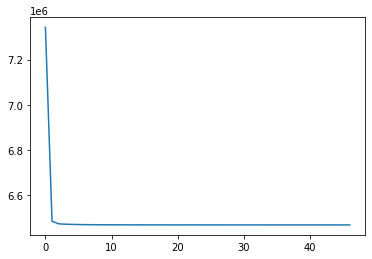

In [62]:
import matplotlib.pyplot as plt
plt.plot(dist_plt)
# beautify the x-labels
#plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
for x in centeroides :  # mean image to each cluster 
     image = x.reshape(28,28,1).squeeze()
     plt.imshow(image)
     plt.show()